# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

Hint: you can ask us - Anna or any of the friendly Teaching Assistants - for help at any point if you get 
stuck!

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2022/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Overview

Today's lecture has 3 parts. 
* First we'll give you an introduction to data visualization with a little data visualization exercise and a video from Sune. 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

Now, to the exercise:

> *Exercise 1.1*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises - and read the Wikipedia page. **Note:** Uncomment the line in the cell below to watch the video!

data0 meanx:  9.00 meany:  7.50
data1 meanx:  9.00 meany:  7.50
data2 meanx:  9.00 meany:  7.50
data3 meanx:  9.00 meany:  7.50

data0 varx: 10.000 vary: 3.752
data1 varx: 10.000 vary: 3.752
data2 varx: 10.000 vary: 3.748
data3 varx: 10.000 vary: 3.748

data0 corxy: 0.816
data1 corxy: 0.816
data2 corxy: 0.816
data3 corxy: 0.817

data0 slope:  0.50 intercept:  3.00
data1 slope:  0.50 intercept:  3.00
data2 slope:  0.50 intercept:  3.00
data3 slope:  0.50 intercept:  3.00


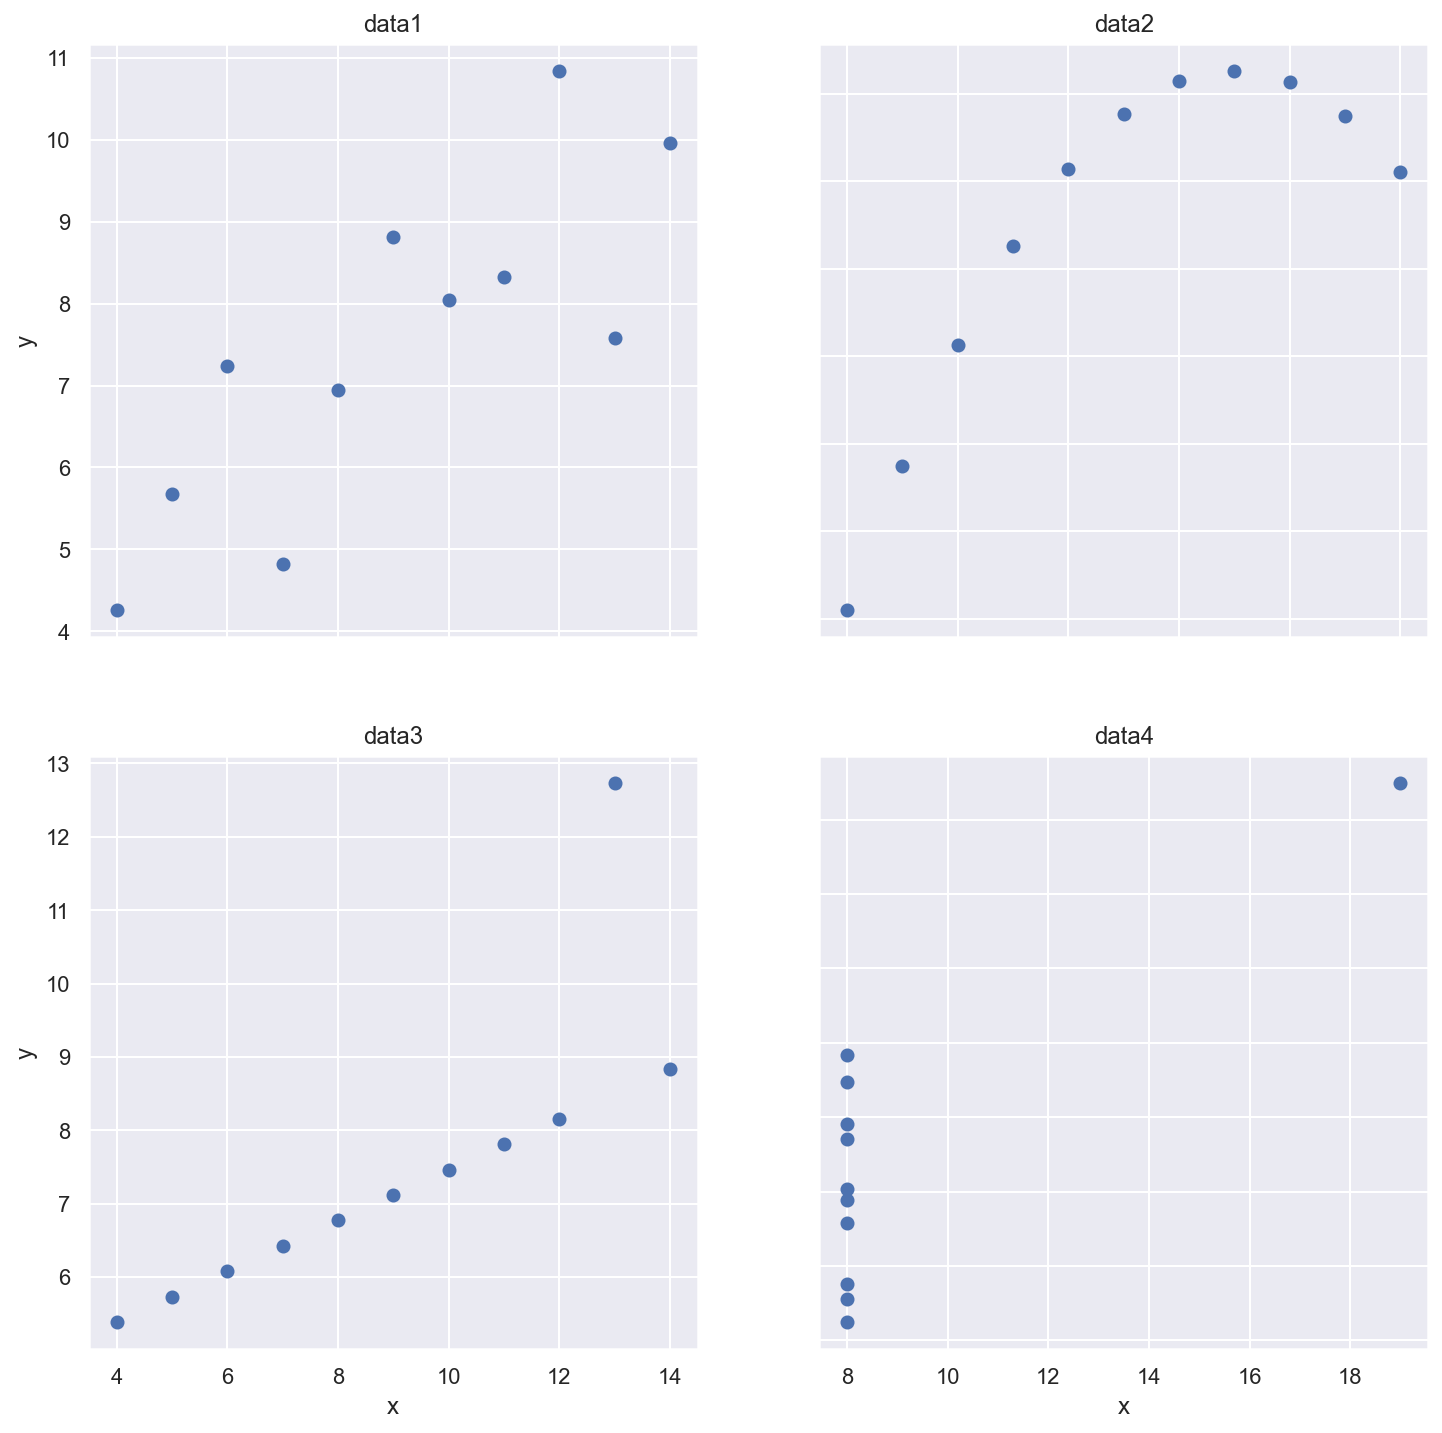

In [1]:
from IPython.display import YouTubeVideo
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(12,12)})
#Uncomment the following line to watch the video
#YouTubeVideo("DbJyPELmhJc",width=800, height=450)

colnames = ['x', 'y']
df1 = pd.read_csv('../files/data1.tsv', names=colnames, header=None, sep='\t')
df2 = pd.read_csv('../files/data2.tsv', names=colnames, header=None, sep='\t')
df3 = pd.read_csv('../files/data3.tsv', names=colnames, header=None, sep='\t')
df4 = pd.read_csv('../files/data4.tsv', names=colnames, header=None, sep='\t')
dfs = [df1, df2, df3, df4]

for i, df in enumerate(dfs):
    print('data{} meanx: {:5.2f} meany: {:5.2f}'.format(i, np.mean(df['x']), np.mean(df['y'])))
    
print()
for i, df in enumerate(dfs):
    print('data{} varx: {:5.3f} vary: {:5.3f}'.format(i, np.var(df['x']), np.var(df['y'])))
    
print()
for i, df in enumerate(dfs):
    print('data{} corxy: {:5.3f}'.format(i, np.corrcoef(df['x'], df['y'])[0, 1]))

print()
for i, df in enumerate(dfs):
    slope, intercept, _, _, _ = stats.linregress(df['x'], df['y'])
    print('data{} slope: {:5.2f} intercept: {:5.2f}'.format(i, slope, intercept))

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(df1['x'], df1['y'])
axs[0, 0].set_title('data1')
axs[0, 1].scatter(df2['x'], df2['y'])
axs[0, 1].set_title('data2')
axs[1, 0].scatter(df3['x'], df3['y'])
axs[1, 0].set_title('data3')
axs[1, 1].scatter(df4['x'], df4['y'])
axs[1, 1].set_title('data4')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


## Text by Thomas
The purpose of the exercise is to illustrate the importance of both creating plots/visualizing data and computing statistical measures to perform a proper analysis of datasets. Only judging the datasets from the numbers, they seem to be identical and thus similar conclusions can be made. Visualizing them shows that the datasets actually are vastly different from each other.

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise 1.2:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

Data is what we generally want to visualize. Think x y values, weight, speed, cash balance etc. Metadata gives context. Data was generated by a garmin watch, author, date created, file size etc.
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

Primarily agree - The human eye is incredibly efficient at picking out obvious outliers, but is not very good when ambiguity occurs - as with the Wheres Waldo images.
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

Overall income trend in a country with large inequality. Comparing data where gender influences it greatly.
> * In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 

Exploratory is 'getting to know the data better'. Explanatory is 'presenting specific behaviour which the data exhibits'.


## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [49]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> *Exercise 2.1*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [48]:
df = pd.read_csv('data/crimedata.csv')

In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df = df[df['Year'] != '2018']

df['Datetime'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Datetime'] = df['Datetime'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Day'] = df['Date'].dt.dayofweek
df = df[df['PdDistrict'].notna()]

df.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Datetime,Day
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,2003-09-28 10:00:00,6
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,...,NaN,2.0,NaN,NaN,NaN,NaN,97.0,2005,2005-06-22 12:20:00,2
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,2006-07-15,00:55,CENTRAL,NONE,...,NaN,2.0,NaN,NaN,NaN,NaN,106.0,2006,2006-07-15 00:55:00,5
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,2007-09-25,00:01,TARAVAL,NONE,...,NaN,1.0,NaN,NaN,NaN,NaN,49.0,2007,2007-09-25 00:01:00,1
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,2011-09-24,11:00,TARAVAL,LOCATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,2011-09-24 11:00:00,5


In [54]:
df = df[df['Category'].isin(focuscrimes)]
set(df['Category']) == focuscrimes

True

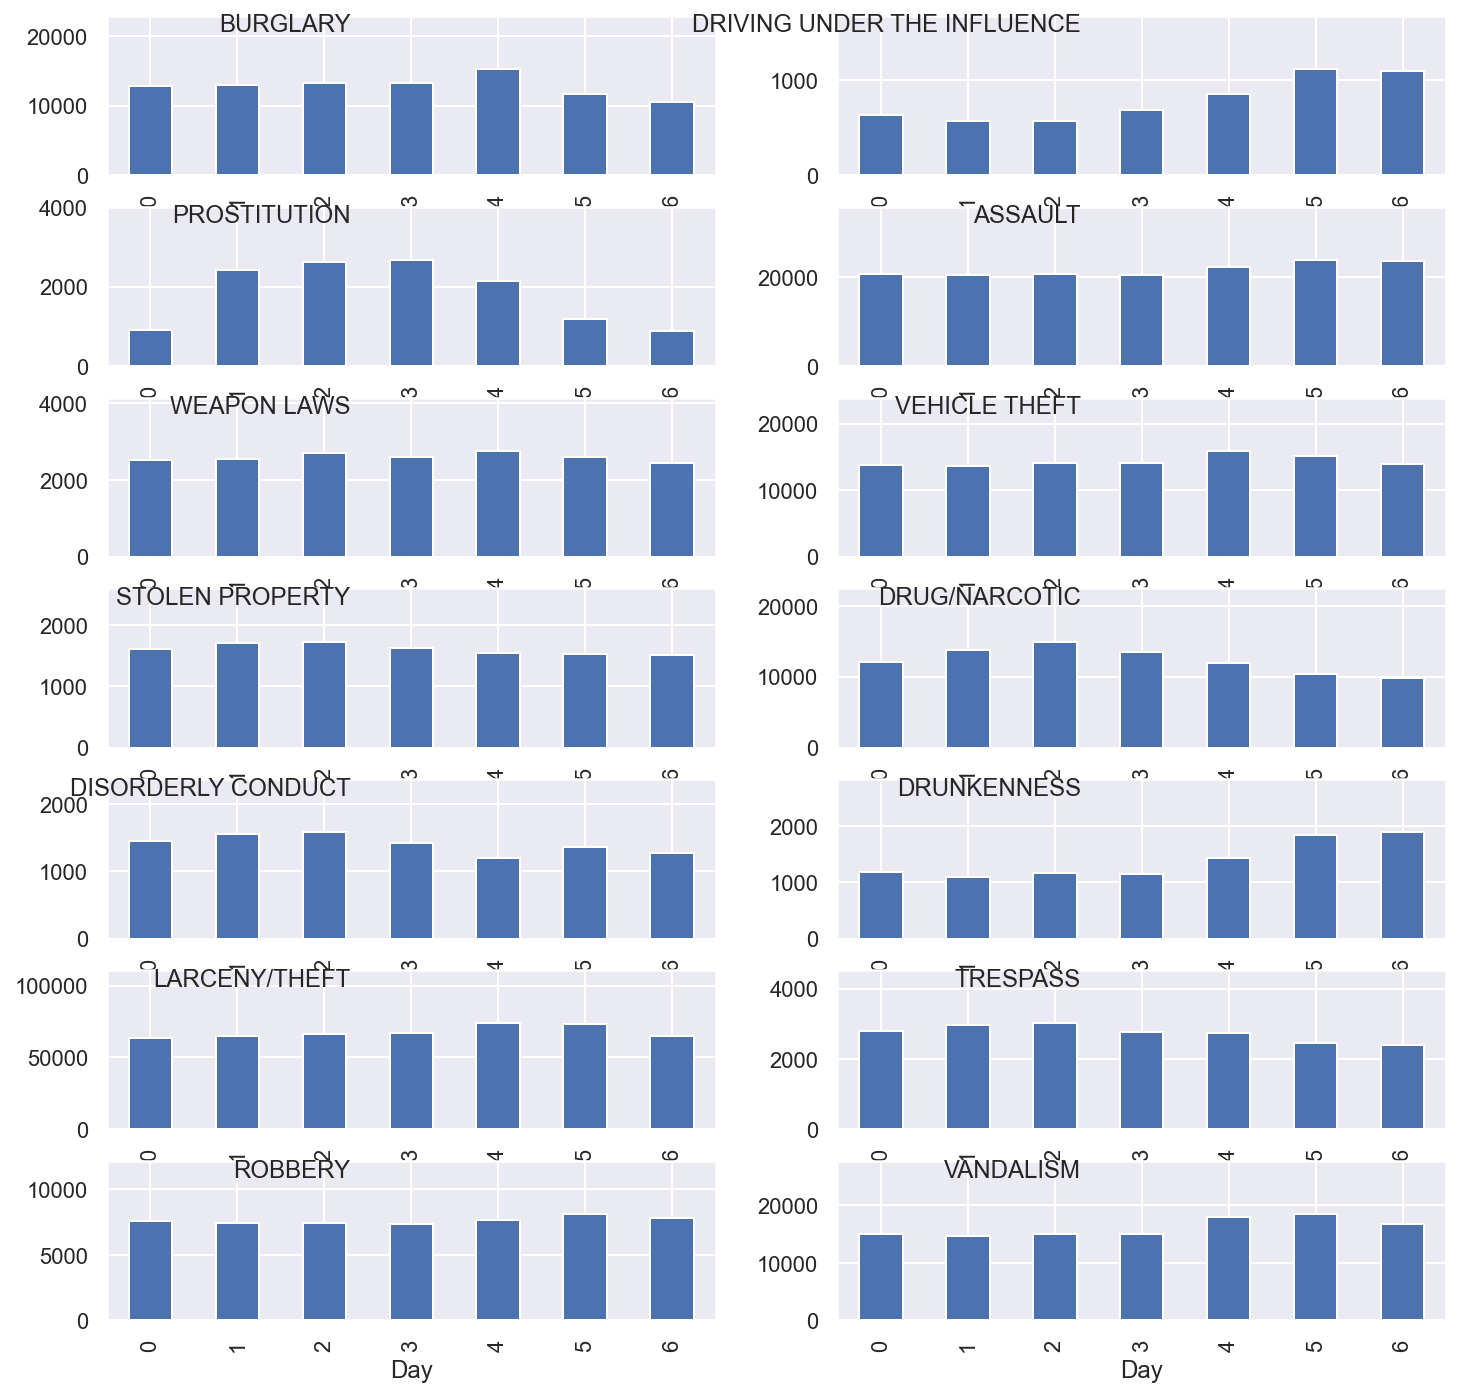

In [12]:
fig, axs = plt.subplots(len(focuscrimes) // 2, 2)
#df_grouped.loc[df_grouped['Category'] == 'ARSON'].head(5)
#df_grouped.plot(kind='bar')

for i, cat in enumerate(focuscrimes):
    c, r = i % 2, i // 2
    res = df.loc[df['Category'] == cat].groupby('Day').IncidntNum.nunique()
    res.plot(kind='bar', ax=axs[r, c])
    axs[r, c].text(0.4, 0.9, cat, 
        transform=axs[r, c].transAxes, ha="right")
    axs[r, c].set_ylim(0, max(res) * 1.5)


    

    

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.2*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? However, when generating meaningful visualizations, we need to be wary of *perceptual errors*. We'll have a look at this in the final exercise while also having fun with some geodata!

In [55]:
# Print 10 Police Department Districts
list(set(df['PdDistrict']))

['BAYVIEW',
 'INGLESIDE',
 'TARAVAL',
 'TENDERLOIN',
 'MISSION',
 'NORTHERN',
 'PARK',
 'SOUTHERN',
 'CENTRAL',
 'RICHMOND']

In [56]:
cnts = df['PdDistrict'].value_counts()
cnts

SOUTHERN      226805
NORTHERN      172194
MISSION       162971
CENTRAL       139961
BAYVIEW       112054
TENDERLOIN    104950
INGLESIDE     101328
TARAVAL        88132
PARK           67645
RICHMOND       66770
Name: PdDistrict, dtype: int64

In [124]:
# Calculate P(crime)
p_crime = df.groupby('Category')["PdId"].count().reset_index(name="count")
p_crime['count'] = p_crime['count'] / p_crime['count'].sum()
p_crime = pd.concat([p_crime] * 10, ignore_index=True)
p_crime.head(10)

,Category,count
0,ASSAULT,0.134407
1,BURGLARY,0.073275
2,DISORDERLY CONDUCT,0.007992
3,DRIVING UNDER THE INFLUENCE,0.004548
4,DRUG/NARCOTIC,0.094802
5,DRUNKENNESS,0.007853
6,LARCENY/THEFT,0.384591
7,PROSTITUTION,0.013277
8,ROBBERY,0.043826
9,STOLEN PROPERTY,0.009213


In [125]:
# Calculate P(crime|district)
p_crimedistrict = df.groupby(["PdDistrict", "Category"])["PdId"].count().reset_index(name="count")
p_crimedistrict['count'] = p_crimedistrict['count'] / p_crimedistrict.groupby('PdDistrict')['count'].transform('sum')
                                                                      
p_crimedistrict.head(10)

,PdDistrict,Category,count
0,BAYVIEW,ASSAULT,0.178628
1,BAYVIEW,BURGLARY,0.085727
2,BAYVIEW,DISORDERLY CONDUCT,0.004873
3,BAYVIEW,DRIVING UNDER THE INFLUENCE,0.004061
4,BAYVIEW,DRUG/NARCOTIC,0.085860
5,BAYVIEW,DRUNKENNESS,0.005078
6,BAYVIEW,LARCENY/THEFT,0.246649
7,BAYVIEW,PROSTITUTION,0.001214
8,BAYVIEW,ROBBERY,0.055268
9,BAYVIEW,STOLEN PROPERTY,0.007987


In [126]:
p_crimeindex = p_crimedistrict.copy()
p_crimeindex['count'] = p_crimedistrict['count'] / p_crime['count']
p_crimeindex.describe()

,count
count,140.000000
mean,0.999443
std,0.523754
min,0.020042
25%,0.721346
50%,0.921045
75%,1.222019
max,3.799193


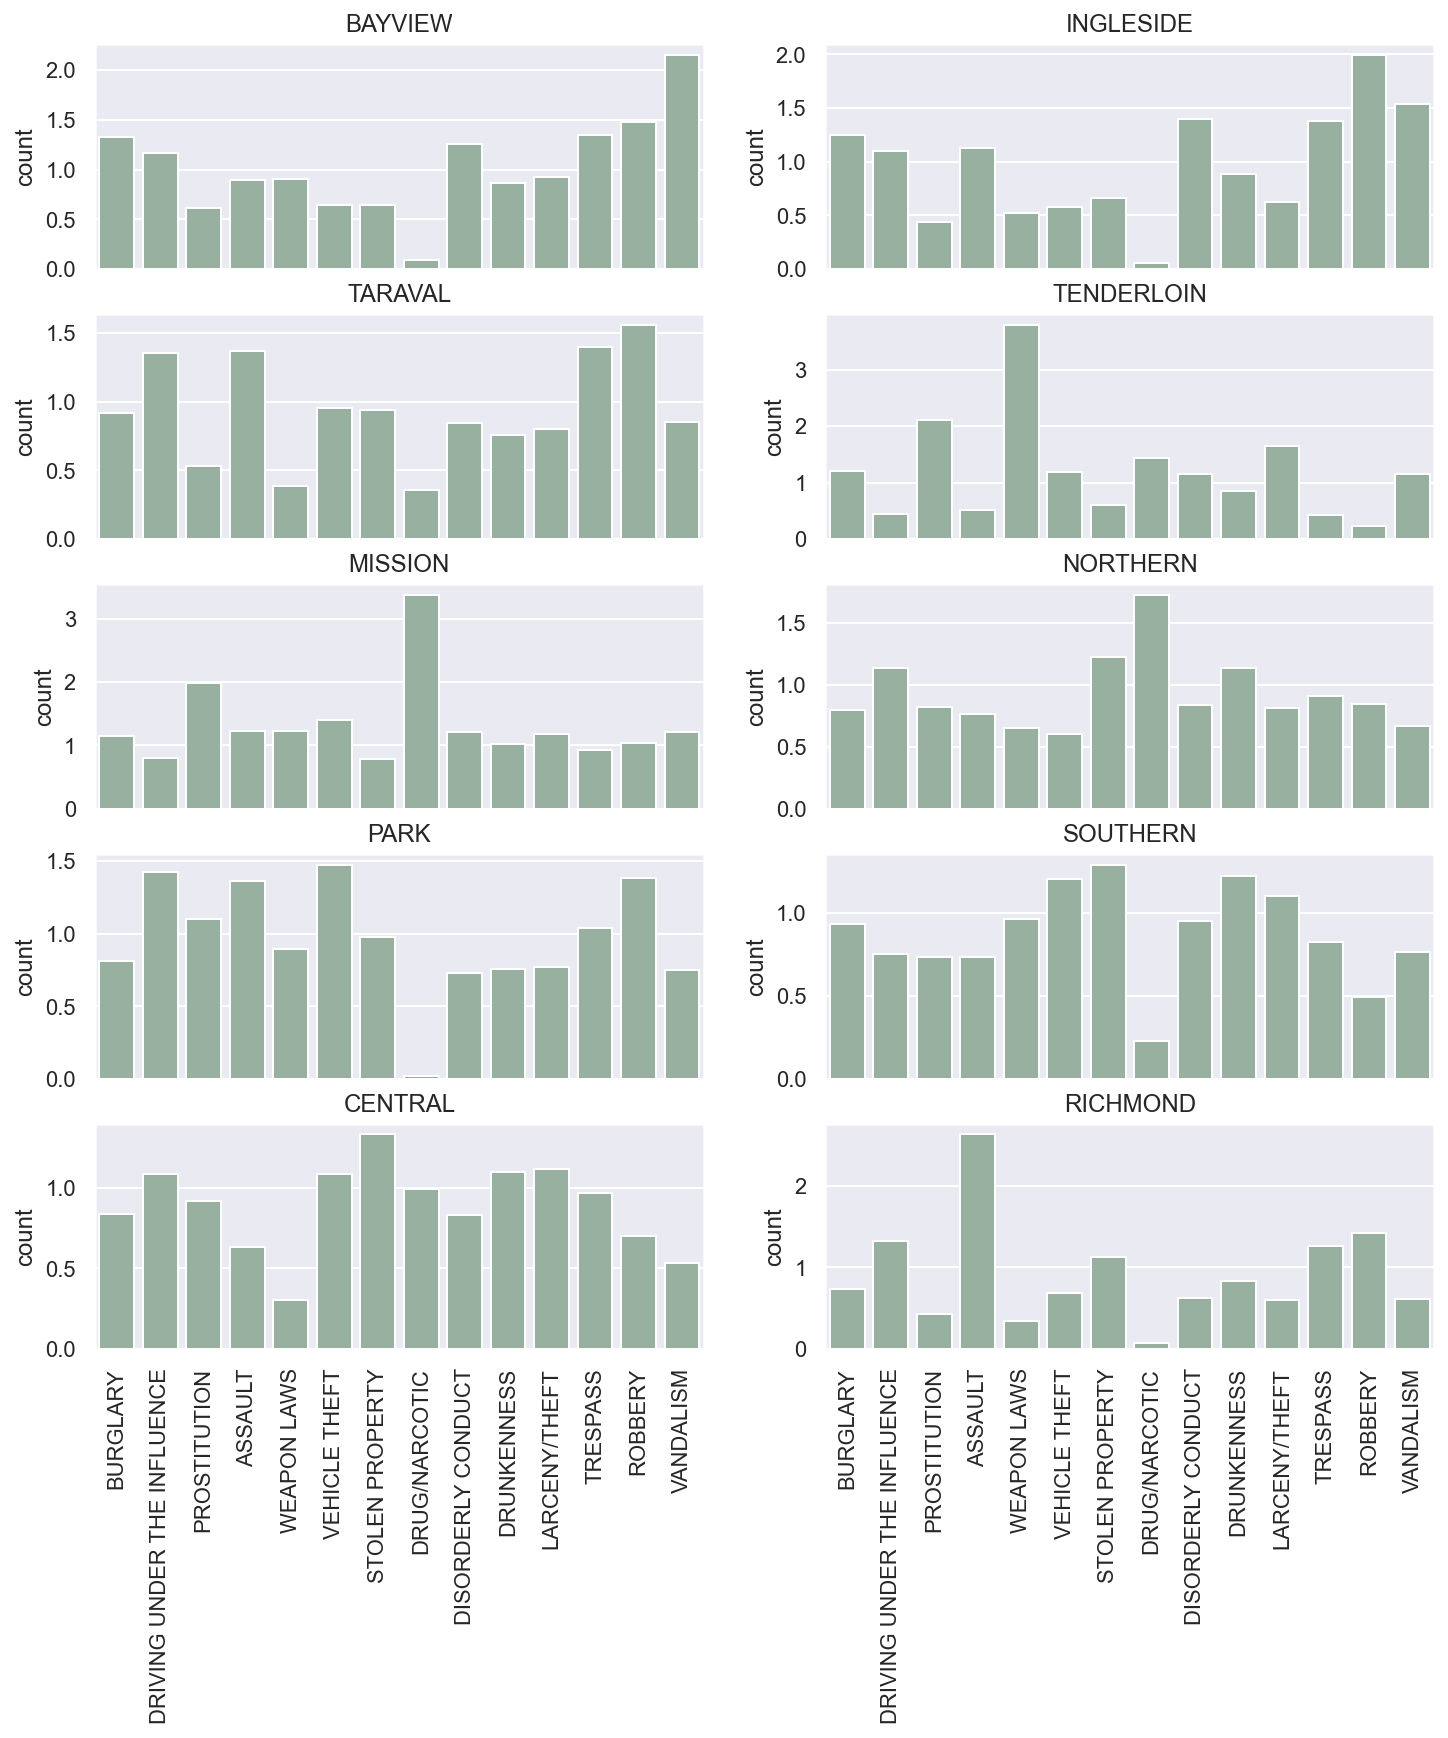

In [168]:
fig, axs = plt.subplots(len(set(df['PdDistrict'])) // 2, 2)
for i, dist in enumerate(set(df['PdDistrict'])):
    c, r = i % 2, i // 2
    res = p_crimeindex.loc[p_crimeindex['PdDistrict'] == dist]
    
    
    g = sns.barplot(x='Category',
                     y='count',
                     ci=None,
                     data=res,
                     ax=axs[r, c],
                     color='#94B49F')
    g.set_xticklabels(focuscrimes, rotation=90);
    g.set_title(dist)
    if r < 4:
        g.set_xticks([])
    g.set(xlabel=None)

## Part 3: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise 3a*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [6]:
randomdata = {'CENTRAL': 0.8903601342256143,
 'SOUTHERN': 0.8642882941363439,
 'BAYVIEW': 0.925634097746596,
 'MISSION': 0.7369022697287458,
 'PARK': 0.9864113307070926,
 'RICHMOND': 0.5422239624697017,
 'INGLESIDE': 0.5754056712571605,
 'TARAVAL': 0.5834730737348696,
 'NORTHERN': 0.08148199528212985,
 'TENDERLOIN': 0.37014287986350447}

df = pd.DataFrame({'VALUE': randomdata.values(), 'DISTRICT': randomdata.keys()})
df.head()

,VALUE,DISTRICT
0,0.890360,CENTRAL
1,0.864288,SOUTHERN
2,0.925634,BAYVIEW
3,0.736902,MISSION
4,0.986411,PARK


> *Exercise 3a* continued:
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

![map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

In [23]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    shp = json.load(response)

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=shp, locations='DISTRICT', color='VALUE',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7749, "lon": -122.431297},
                           opacity=0.5,
                           labels={'VALUE':'Crime rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> *Exercise 3b:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * *Try this for Extra credit:*
>     * Create plots for the same crime type, but different days, and comment on the results.

In [44]:
df_grouped.head(37)

,PdDistrict,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,Resolution,...,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Day
0,BAYVIEW,2297,2297,2297,2297,2297,2297,2297,2297,2297,...,132,133,2296,2,2,3,8,2297,2297,2297
1,CENTRAL,1482,1482,1482,1482,1482,1482,1482,1482,1482,...,219,202,1482,23,23,7,19,1482,1482,1482
2,INGLESIDE,2825,2825,2825,2825,2825,2825,2825,2825,2825,...,222,0,2818,0,0,56,21,2812,2825,2825
3,MISSION,2367,2367,2367,2367,2367,2367,2367,2367,2367,...,585,160,2367,0,0,1629,22,2357,2367,2367
4,NORTHERN,1983,1983,1983,1983,1983,1983,1983,1983,1983,...,152,286,1983,153,173,209,33,1972,1983,1983
5,PARK,1320,1320,1320,1320,1320,1320,1320,1320,1320,...,118,3,1320,0,0,63,24,1313,1320,1320
6,RICHMOND,1358,1358,1358,1358,1358,1358,1358,1358,1358,...,42,0,1358,0,0,0,26,1345,1358,1358
7,SOUTHERN,1540,1540,1540,1540,1540,1540,1540,1540,1540,...,361,575,1537,341,350,515,64,1532,1540,1540
8,TARAVAL,1928,1928,1928,1928,1928,1928,1928,1928,1928,...,180,18,1927,0,0,2,2,1926,1928,1928
9,TENDERLOIN,353,353,353,353,353,353,353,353,353,...,194,332,353,336,336,89,8,353,353,353


In [50]:
df_sunday = df[(df['Day'] == 2) & (df['Category'] == 'VEHICLE THEFT') ]
df_grouped = df_sunday.groupby('PdDistrict').count().reset_index()

fig = px.choropleth_mapbox(df_grouped, geojson=shp, locations='PdDistrict', color='IncidntNum',
                           color_continuous_scale="Viridis",
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7749, "lon": -122.431297},
                           opacity=0.5,
                           labels={'VALUE':'Crime rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [167]:
p_crimeindex.head()

,PdDistrict,Category,count
0,BAYVIEW,ASSAULT,1.329012
1,BAYVIEW,BURGLARY,1.169927
2,BAYVIEW,DISORDERLY CONDUCT,0.609724
3,BAYVIEW,DRIVING UNDER THE INFLUENCE,0.892867
4,BAYVIEW,DRUG/NARCOTIC,0.905680
